## K-Nearest Classification

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


In [31]:
df.head(9)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
5,2,41,39,0,17,78.0,2,16,0.0,1,1,3
6,3,45,22,1,2,19.0,2,4,0.0,1,5,2
7,2,38,35,0,5,76.0,2,10,0.0,0,3,4
8,3,45,59,1,7,166.0,4,31,0.0,0,5,3


- 1 = Basic Service
- 2 = E-Service
- 3 = Plus Service
- 4 = Total Service

In [32]:
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

array([[<Axes: title={'center': 'income'}>]], dtype=object)

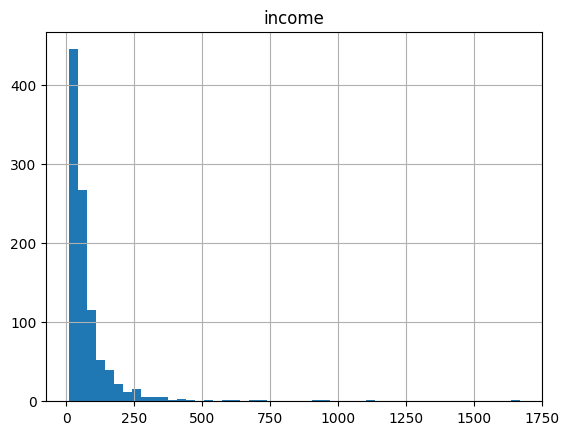

In [5]:
df.hist(column="income", bins=50)

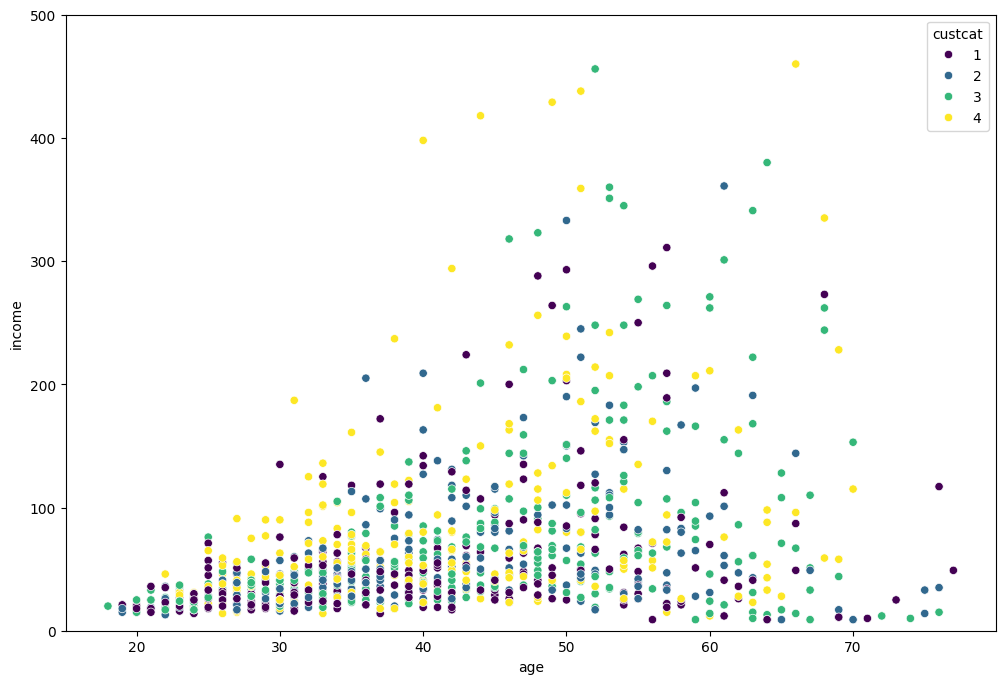

In [33]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,
                x="age",
                y="income",
                hue='custcat',
                palette='viridis'
                )
plt.ylim(0,500)
plt.show()

KNN
1. Pick a k value
2. Calculate the distant(dissimilatrity) of unkown case from all casses
3. Select the K-observations in the training data that are "nearest" to the unknoown data point.
4. Predict the response of the unkown data point, using the most popular response value from the k-nearest neighbours.

- First pick k = 1
- Calculate and make pred until k = 20
- Compare results

- K=1 may capture the noise in data. A low value of K causes over-fitting. Prediction is not good enough for out-of-sample cases.
- K=20 The model becomes overly generalized, if value of K is too high. 

- If we use 2 features (age, income), we are using it in a 2-dimensional space.
- We can also use the same distance matrix for multi-dimensional vectors.

# Exercise

- Normalize the data: StandardScalar
- Classification : KNeighbourClassifier
- Training k = 4
- Evaluation : accuracy_score

### Normalizing the data

In [12]:
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
 
scaler.fit(df.drop('custcat', axis=1))
scaled_features = scaler.transform(df.drop('custcat',
                                           axis=1))
 
df_feat = pd.DataFrame(scaled_features,
                       columns=df.columns[:-1])
df_feat.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,-0.026968,-1.055125,0.184505,1.010051,-0.253034,-0.126506,1.087753,-0.594123,-0.222076,-1.034598,-0.230650
1,1.198836,-1.148806,-0.691812,1.010051,-0.451415,0.546450,1.906227,-0.594123,-0.222076,-1.034598,2.556662
2,1.198836,1.521092,0.821826,1.010051,1.234819,0.359517,-1.367671,1.787528,-0.222076,0.966559,-0.230650
3,-0.026968,-0.118319,-0.691812,-0.990050,0.044536,-0.416251,-0.549196,-1.090300,-0.222076,0.966559,-0.927478
4,-0.026968,-0.586722,-0.930808,1.010051,-0.253034,-0.444291,-1.367671,-0.891829,-0.222076,-1.034598,1.163006


In [13]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [14]:
# creating knn classifier and training with data then calculating acc score with test data
def get_knn_acc_score(k,X_train,X_test,y_train,y_test):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    return accuracy_score(y_test, pred)

## Features = age , income, reside

In [15]:
X_train, X_test,y_train, y_test = train_test_split(df_feat[['age','income','reside']],
									df['custcat'],
									test_size=0.20)

In [16]:
get_knn_acc_score(4,X_train, X_test,y_train, y_test)

0.215

In [17]:
get_knn_acc_score(6,X_train, X_test,y_train, y_test)

0.245

In [18]:
get_knn_acc_score(8,X_train, X_test,y_train, y_test)

0.31

In [19]:
get_knn_acc_score(10,X_train, X_test,y_train, y_test)

0.315

In [20]:
get_knn_acc_score(15,X_train, X_test,y_train, y_test)

0.27

In [21]:
get_knn_acc_score(20,X_train, X_test,y_train, y_test)

0.295

## Features = age , income

In [22]:
X_train, X_test,y_train, y_test = train_test_split(df_feat[['age','income']],
									df['custcat'],
									test_size=0.20)



In [23]:
get_knn_acc_score(4,X_train, X_test,y_train, y_test)

0.28

In [24]:
get_knn_acc_score(6,X_train, X_test,y_train, y_test)


0.225

In [25]:
get_knn_acc_score(8,X_train, X_test,y_train, y_test)

0.28

In [26]:
get_knn_acc_score(10,X_train, X_test,y_train, y_test)

0.315

In [27]:
get_knn_acc_score(15,X_train, X_test,y_train, y_test)

0.31

In [28]:
get_knn_acc_score(20,X_train, X_test,y_train, y_test)

0.315

In [29]:
get_knn_acc_score(25,X_train, X_test,y_train, y_test)

0.31

## Features = age, income, reside, ed, address, tenure, employ

In [30]:
X_train, X_test,y_train, y_test = train_test_split(df_feat[['age','income','reside','ed','address','tenure','employ']],
									df['custcat'],
									test_size=0.20)

In [31]:
get_knn_acc_score(4,X_train, X_test,y_train, y_test)

0.3

In [32]:
get_knn_acc_score(8,X_train, X_test,y_train, y_test)

0.345

In [33]:
get_knn_acc_score(10,X_train, X_test,y_train, y_test)

0.405

In [37]:
get_knn_acc_score(15,X_train, X_test,y_train, y_test)

0.335

In [38]:
get_knn_acc_score(20,X_train, X_test,y_train, y_test)

0.34

## Calculating accuaracy for each k value

In [39]:
K_MAX= 10

mean_acc = np.zeros((K_MAX-1))
std_acc = np.zeros((K_MAX-1))

for n in range(1, K_MAX):
    # train and prediction for each k
    classifier = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    pred = classifier.predict(X_test)
    mean_acc[n-1] = accuracy_score(y_test, pred)
    std_acc[n-1] = np.std(pred==y_test)/np.sqrt(pred.shape[0])

## Plotting accuracy for each k value

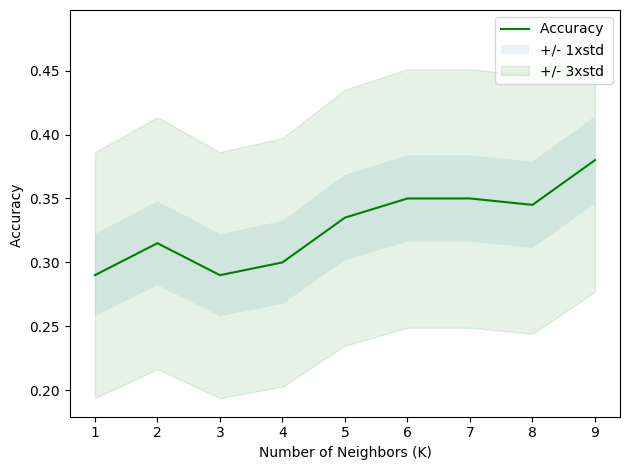

In [40]:
plt.plot(range(1,K_MAX),mean_acc,'g')
plt.fill_between(range(1,K_MAX),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,K_MAX),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [41]:
print( "The best accuracy", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy 0.38 with k= 9
